In [19]:
# Import libraries
import pandas as pd
import geopandas as gpd
# Operations on geometries
import shapely
import numpy as np
import math
import glob 
import xarray as xr
import xarray
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import tensorflow as tf
import statsmodels.api as sm
import xgboost
import xgboost as xgb
import csv as csv
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn import linear_model
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import TimeSeriesSplit,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor  #Perforing grid search
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import scipy
from scipy import stats
import os

import matplotlib.pyplot as plt

from scipy.stats import skew
from collections import OrderedDict


import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

from utils_functions.utils_data import *
from utils_functions.utils_ml import *
from utils_functions.utils_RF import *
from utils_functions.utils_plot import *
from utils_functions.utils_LSTM import *

In [20]:
%matplotlib inline

In [21]:
PATH_dis = '/Users/noeliaotero/Documents/OCCR/data/Output_data/csv/PREVAH_discharge_entsoe_powerplants/mergedata_final/mergedata_with_index//'

In [32]:
include_DIS=True
# try removing discharge
PATH_data_out = '/Users/noeliaotero/Documents/OCCR/data/Output_data/csv/outmodels/simulations_PREVAH/LSTM_withdoi/'
#PATH_data_out = '/Users/noeliaotero/Documents/OCCR/data/Output_data/csv/outmodels/Classical/DisPREVAH_meteo_HPcatch/'
os.makedirs(PATH_data_out, exist_ok=True)

# split in train and test
# data preparation
# Using simulated discharge PREVAH

if include_DIS:
    colnames = ['date', 't2m','prec', 'prec7D', 'prec15D', 'prec30D', 't2m7D', 't2m15D',
           't2m30D','PREVAH','PREVAH7D', 'PREVAH15D', 'PREVAH30D','doi']
    Features = ['t2m','prec', 'prec7D', 'prec15D', 'prec30D', 't2m7D', 't2m15D',
           't2m30D','PREVAH','PREVAH7D', 'PREVAH15D', 'PREVAH30D', 'doi']
else:
    print("not discharge included")
    colnames = ['date', 't2m','prec', 'prec7D', 'prec15D', 'prec30D', 't2m7D', 't2m15D',
           't2m30D']
    Features = ['t2m','prec', 'prec7D', 'prec15D', 'prec30D', 't2m7D', 't2m15D',
           't2m30D']

In [33]:
# Where to save the figures
PROJECT_ROOT_DIR = '/Users/noeliaotero/Documents/OCCR/Results/Hydro_project/Analysis_Updates_June/LSTM_withdoi/PREVAH/'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)


In [34]:
# save results
PATH_OUT = '/Users/noeliaotero/Documents/OCCR/Results/Hydro_project/Analysis_Updates_June/'

In [35]:
list_input = readfiles(PATH_dis)

In [36]:
list_input[0].columns

Index(['date', 'eic_g', 'PowerSystemResourceName', 'name_g', 'name_p',
       'ActualGenerationOutput', 'InstalledGenCapacity', 'capacity_p',
       'generation', 'PREVAH', 'PREVAH_m3s', 'PREVAH7D', 'PREVAH15D',
       'PREVAH30D', 't2m', 't2mmax', 'prec', 'SPID', 'SPI1', 'SPI3', 'SSID',
       'SSI1', 'SSI3', 'prec7D', 'prec15D', 'prec30D', 't2max7D', 't2max15D',
       't2max30D', 't2m7D', 't2m15D', 't2m30D', 'month', 'season', 'spei_1',
       'spei_3', 'spei_6', 'spei_12', 'STI_1', 'STI_2', 'STI_3'],
      dtype='object')

In [37]:
YY_TRAIN = [2016, 2020]
YY_TEST = [2021,2021]
YY_RECONSTRUCTION = [1979, 2015]

In [38]:
#YY2_TRAIN = [2016, 2019]
#YY2_TEST = [2020,2020]
# Using PREVAH I have the same reconstruction!!!
YY_OFIBLE_RECONSTRUCTION = [1981, 2015] #[1987, 2015]
YY_Emos_RECONSTRUCTION =  [1981, 2015] #[1991, 2015]
label = 'generation'

In [39]:
# Run models over all power stations
len(list_input)

6

In [40]:
# Define inputs
EPOCHS = 50
loss_f = 'mean_squared_error'
opt = 'adam'
plot = True
BS = 64 # batch size


In [41]:
# Predict the amount of precipitation
df_out = pd.DataFrame(columns = ['station', 'model', 'train_rmse', 'test_rmse','train_mae', 'test_mae', 'cor_train','cor_test'])

preparing data for 0
LSTM_v1


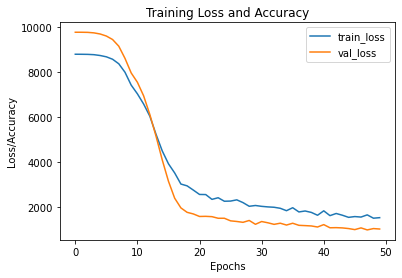

 RMSE: 24.853553
 RMSE: 32.171998


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure AET Leventina_LSTM_v1_reconstruction
Saving figure AET Leventina_LSTM_v1_reconstruction
Saving figure AET Leventina_LSTM_v1test
Saving figure AET Leventina_LSTM_v1train
 Computing LSTM feature importance...


100%|██████████| 13/13 [00:00<00:00, 27.60it/s]



Saving figure AET Leventina_LSTM_v1Feature_IMPORT_test
ann1


/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


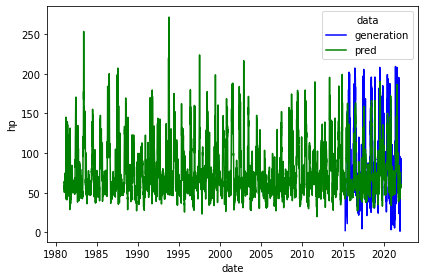

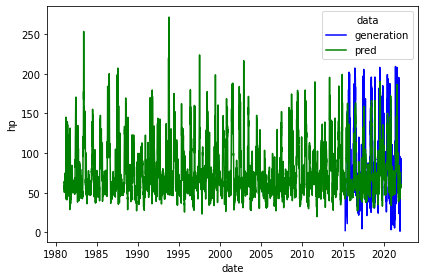

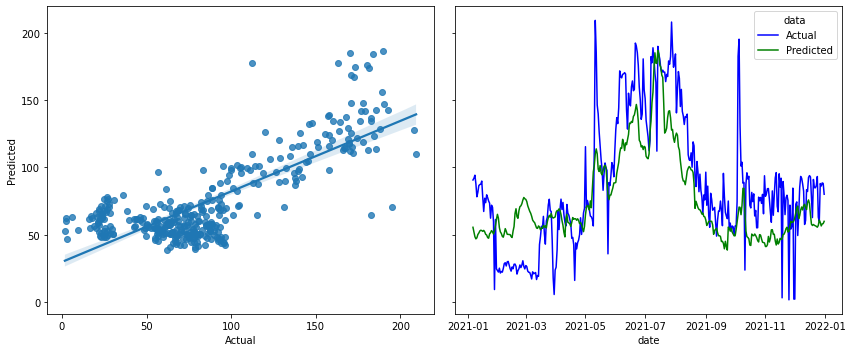

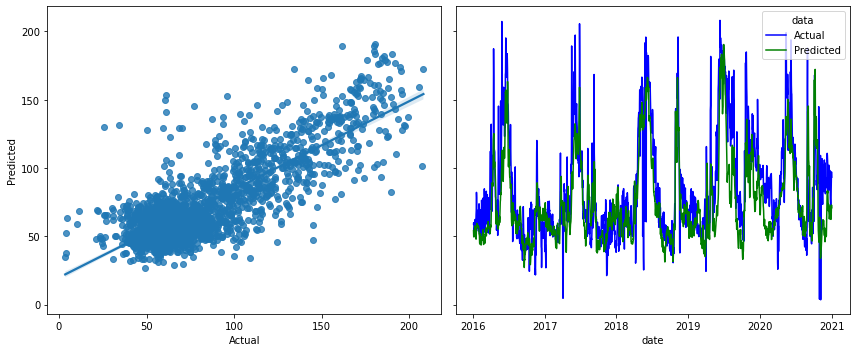

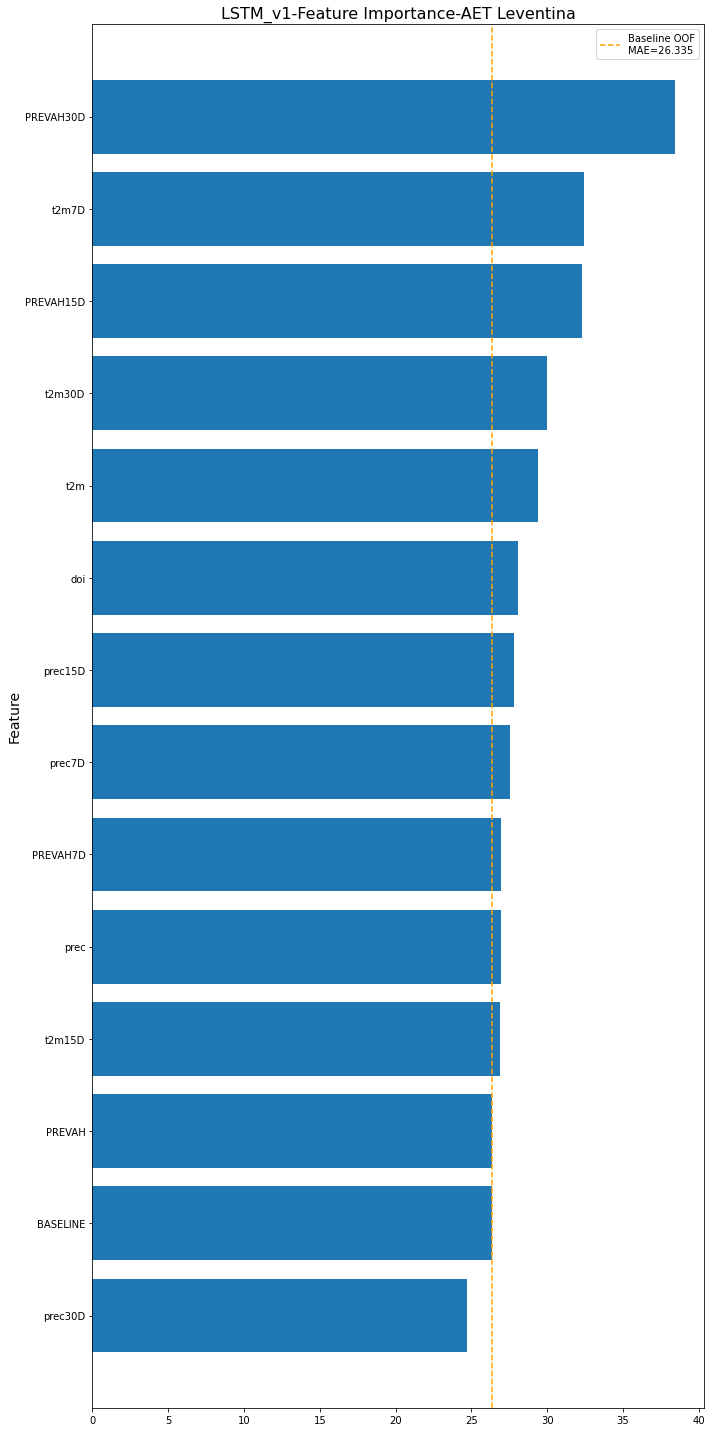

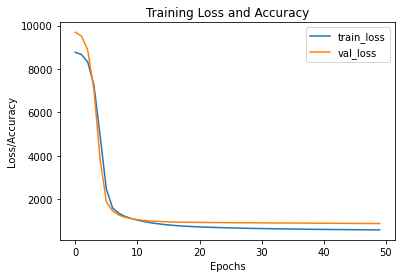

 RMSE: 23.780752
 RMSE: 29.760232


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure AET Leventina_ann1_reconstruction
Saving figure AET Leventina_ann1_reconstruction
Saving figure AET Leventina_ann1test
Saving figure AET Leventina_ann1train
preparing data for 1
LSTM_v1


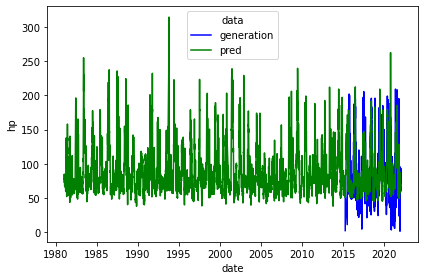

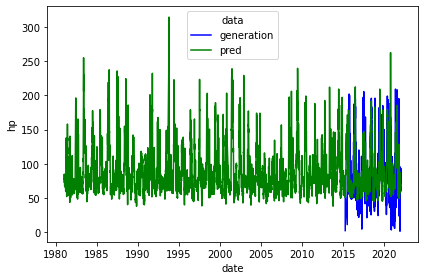

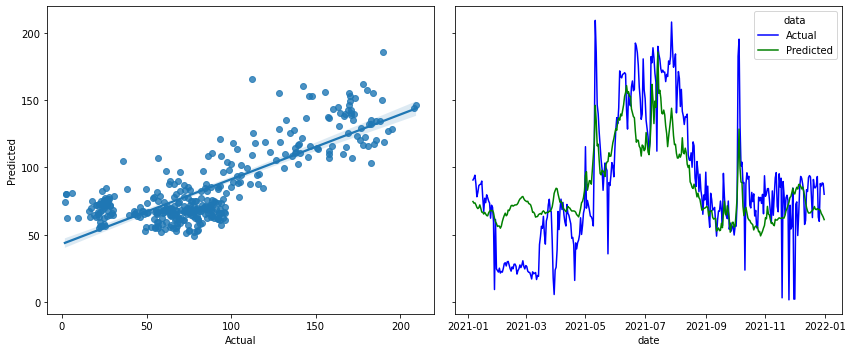

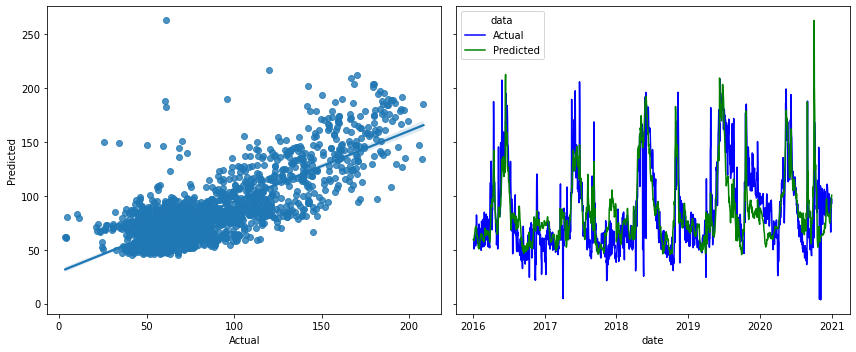

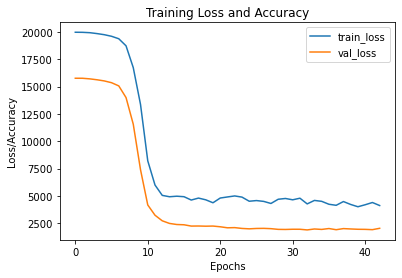

 RMSE: 47.393901
 RMSE: 45.031762


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Electra-Massa (EM)_LSTM_v1_reconstruction
Saving figure Electra-Massa (EM)_LSTM_v1_reconstruction
Saving figure Electra-Massa (EM)_LSTM_v1test
Saving figure Electra-Massa (EM)_LSTM_v1train
 Computing LSTM feature importance...


100%|██████████| 13/13 [00:00<00:00, 23.63it/s]
/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



Saving figure Electra-Massa (EM)_LSTM_v1Feature_IMPORT_test
ann1


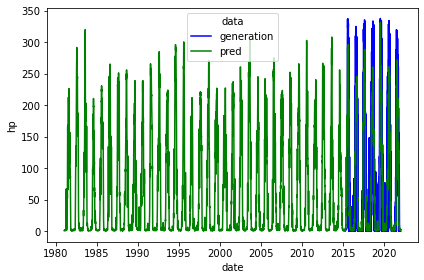

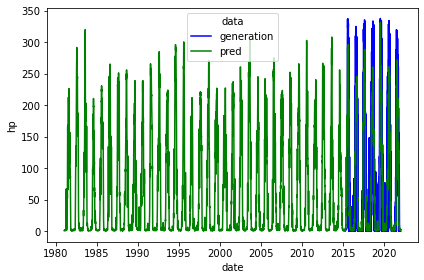

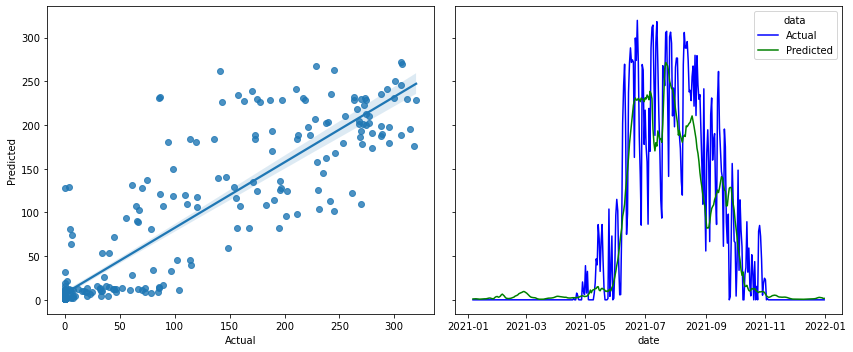

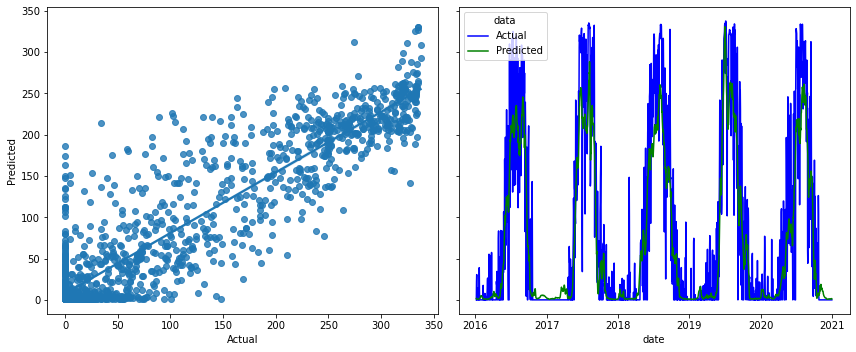

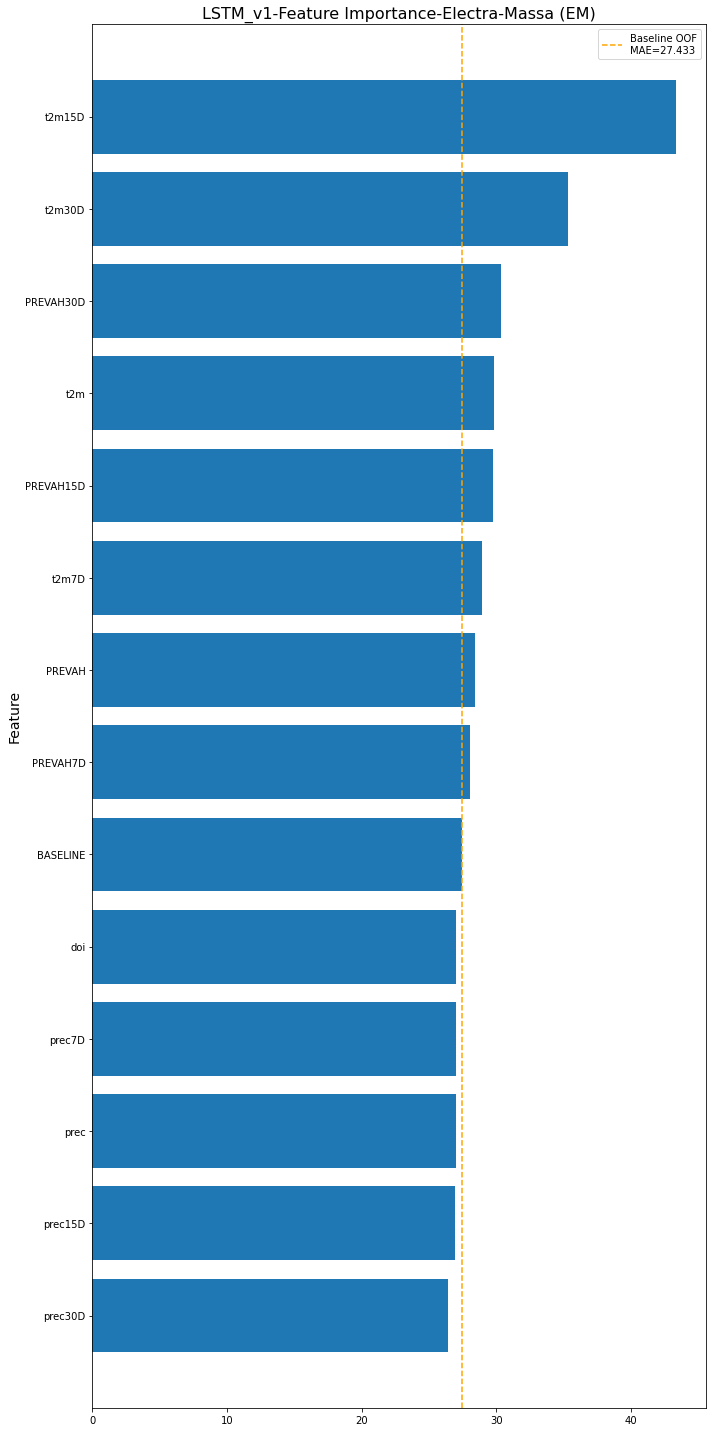

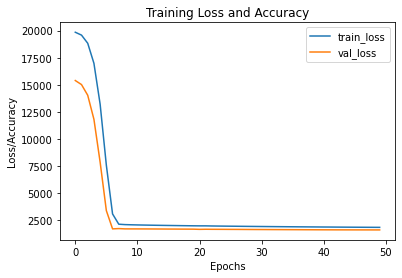

 RMSE: 42.843261
 RMSE: 40.291407


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Electra-Massa (EM)_ann1_reconstruction
Saving figure Electra-Massa (EM)_ann1_reconstruction
Saving figure Electra-Massa (EM)_ann1test
Saving figure Electra-Massa (EM)_ann1train
preparing data for 2
selecting different reconstruction dates
LSTM_v1


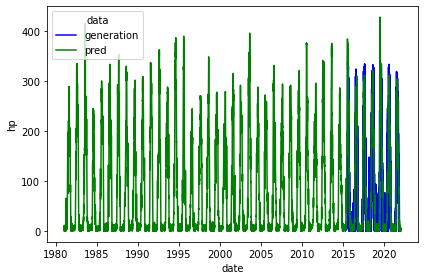

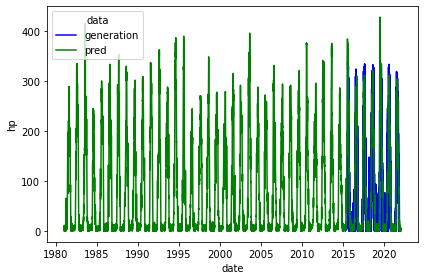

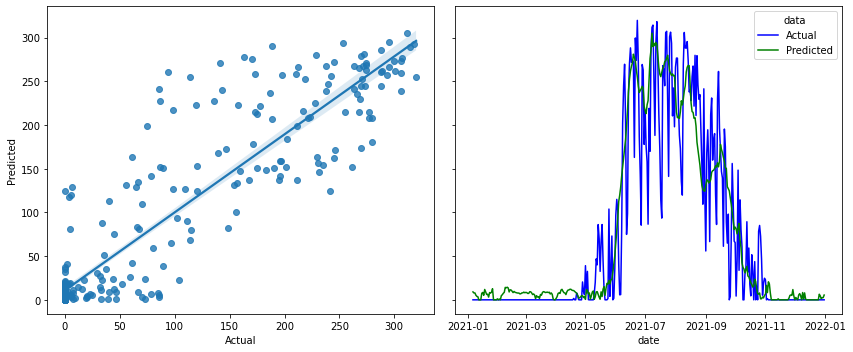

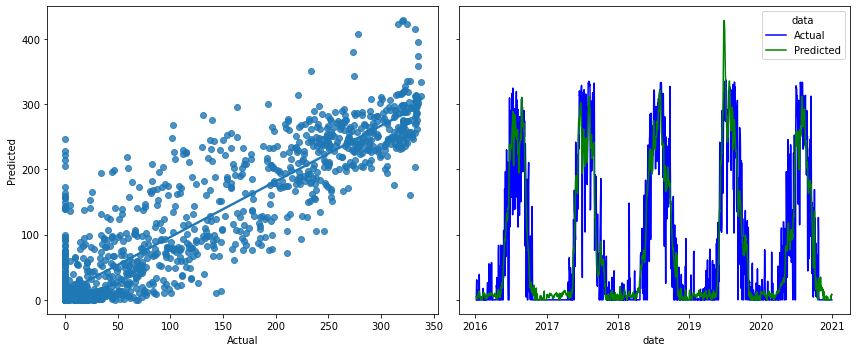

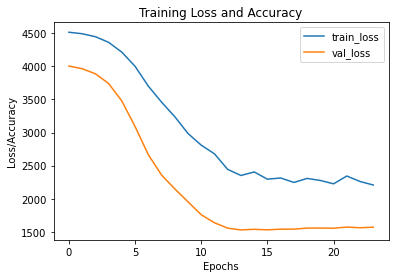

 RMSE: 42.953642
 RMSE: 39.634069


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Emosson (ESA)_LSTM_v1_reconstruction
Saving figure Emosson (ESA)_LSTM_v1_reconstruction
Saving figure Emosson (ESA)_LSTM_v1test
Saving figure Emosson (ESA)_LSTM_v1train
 Computing LSTM feature importance...


100%|██████████| 13/13 [00:00<00:00, 28.85it/s]
/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



Saving figure Emosson (ESA)_LSTM_v1Feature_IMPORT_test
ann1


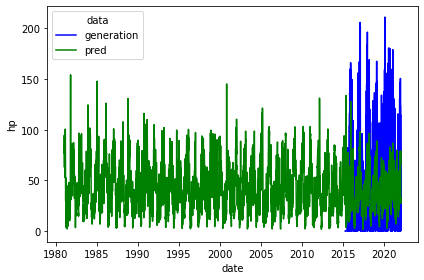

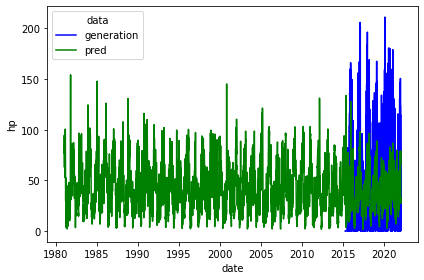

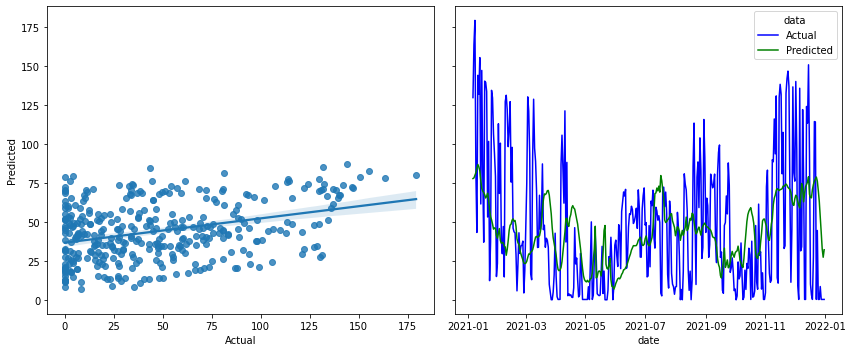

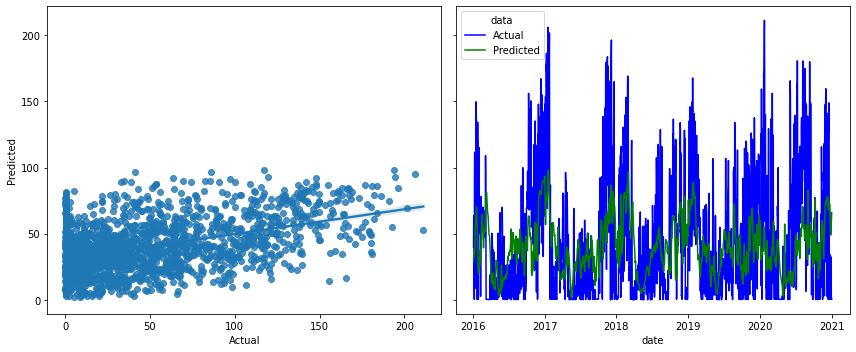

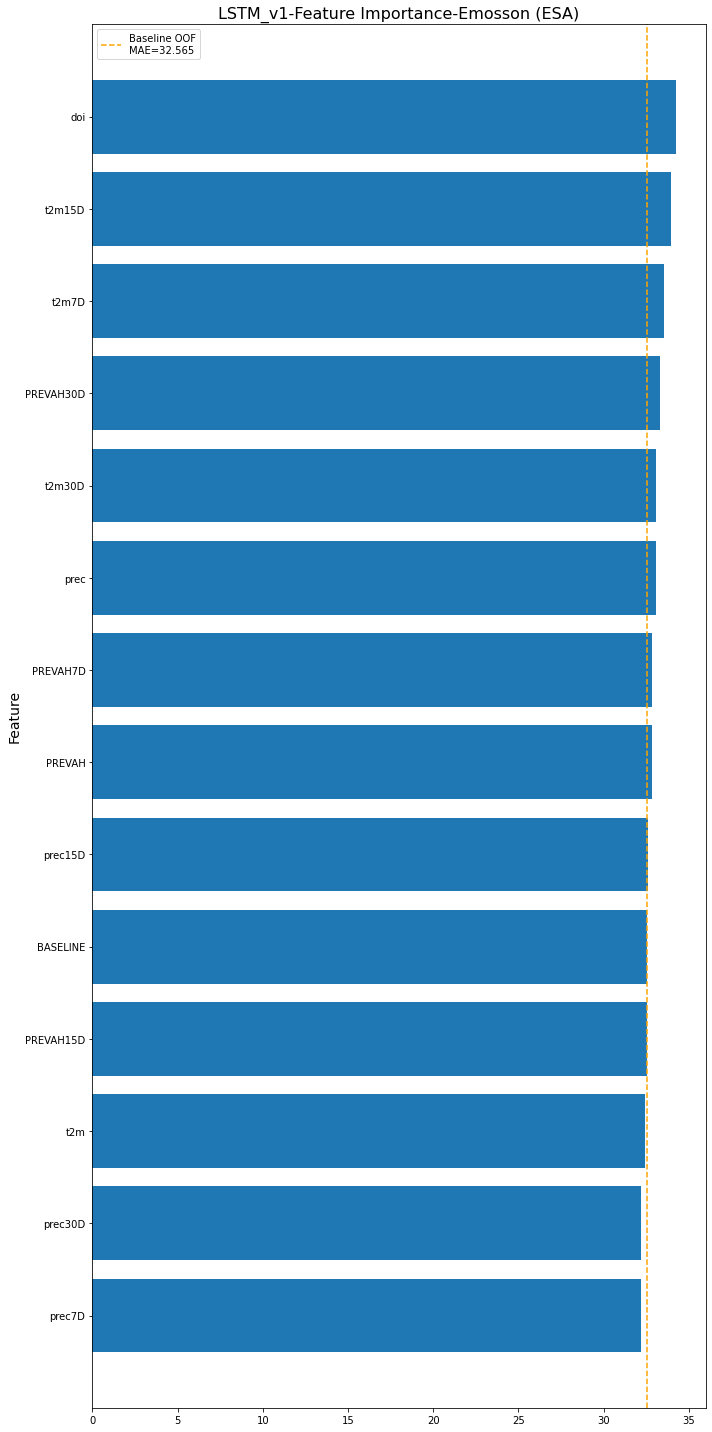

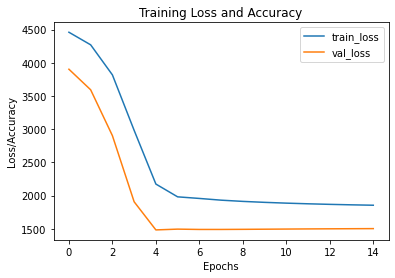

 RMSE: 42.801687
 RMSE: 38.756250


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Emosson (ESA)_ann1_reconstruction
Saving figure Emosson (ESA)_ann1_reconstruction
Saving figure Emosson (ESA)_ann1test
Saving figure Emosson (ESA)_ann1train
preparing data for 3
LSTM_v1


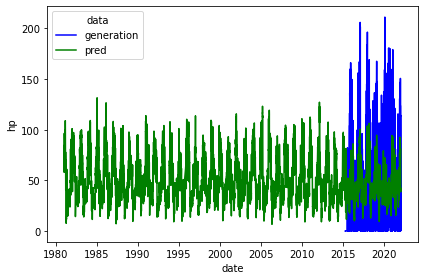

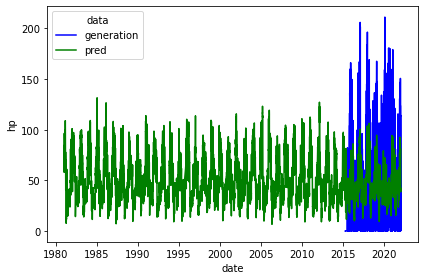

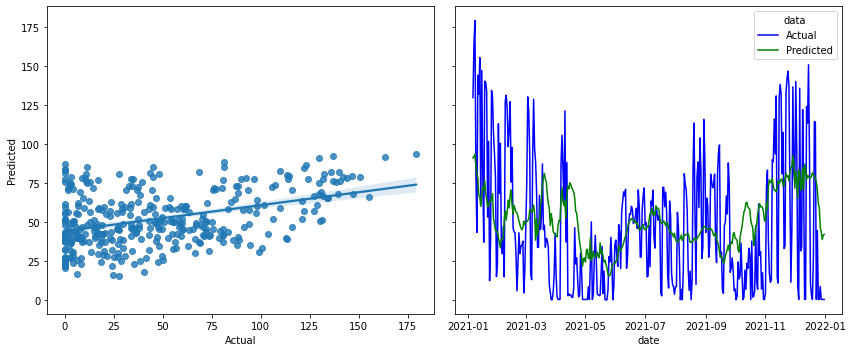

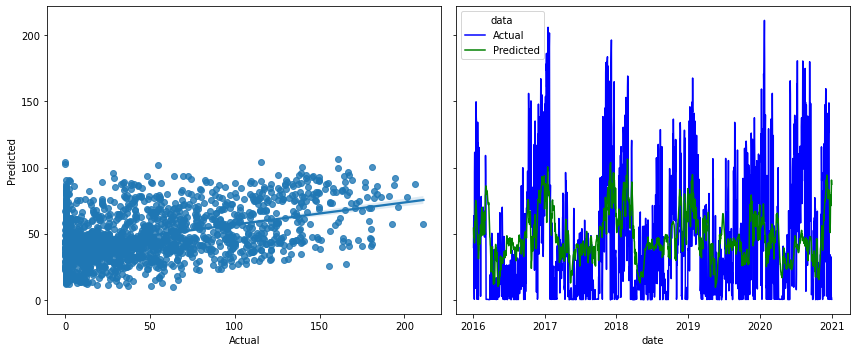

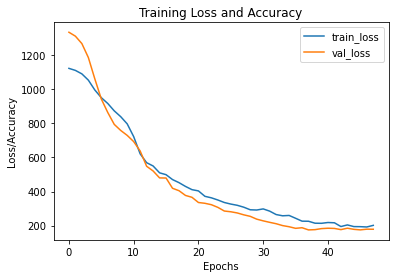

 RMSE: 10.226395
 RMSE: 13.372649


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure KW Rheinfelden CH_LSTM_v1_reconstruction
Saving figure KW Rheinfelden CH_LSTM_v1_reconstruction
Saving figure KW Rheinfelden CH_LSTM_v1test
Saving figure KW Rheinfelden CH_LSTM_v1train
 Computing LSTM feature importance...


100%|██████████| 13/13 [00:00<00:00, 29.45it/s]
/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



Saving figure KW Rheinfelden CH_LSTM_v1Feature_IMPORT_test
ann1


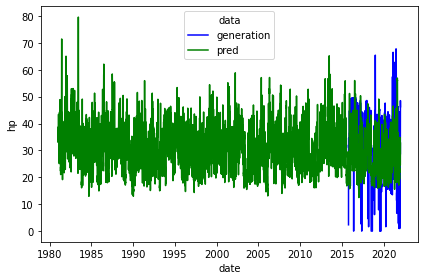

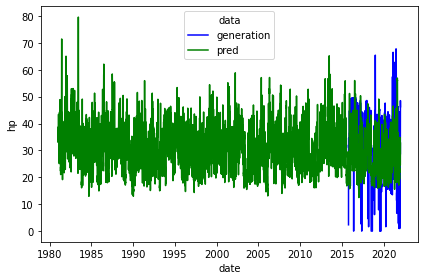

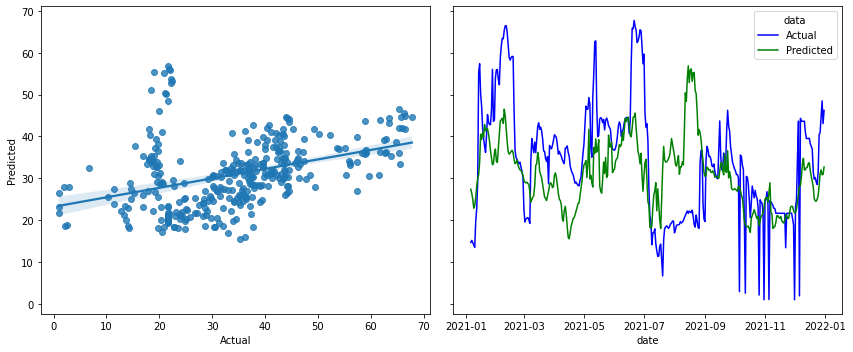

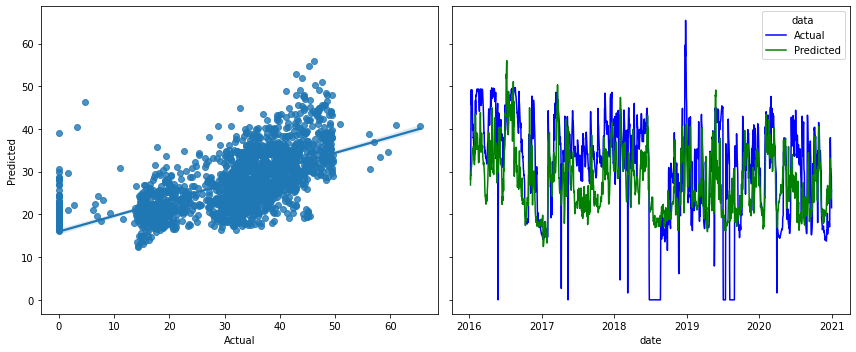

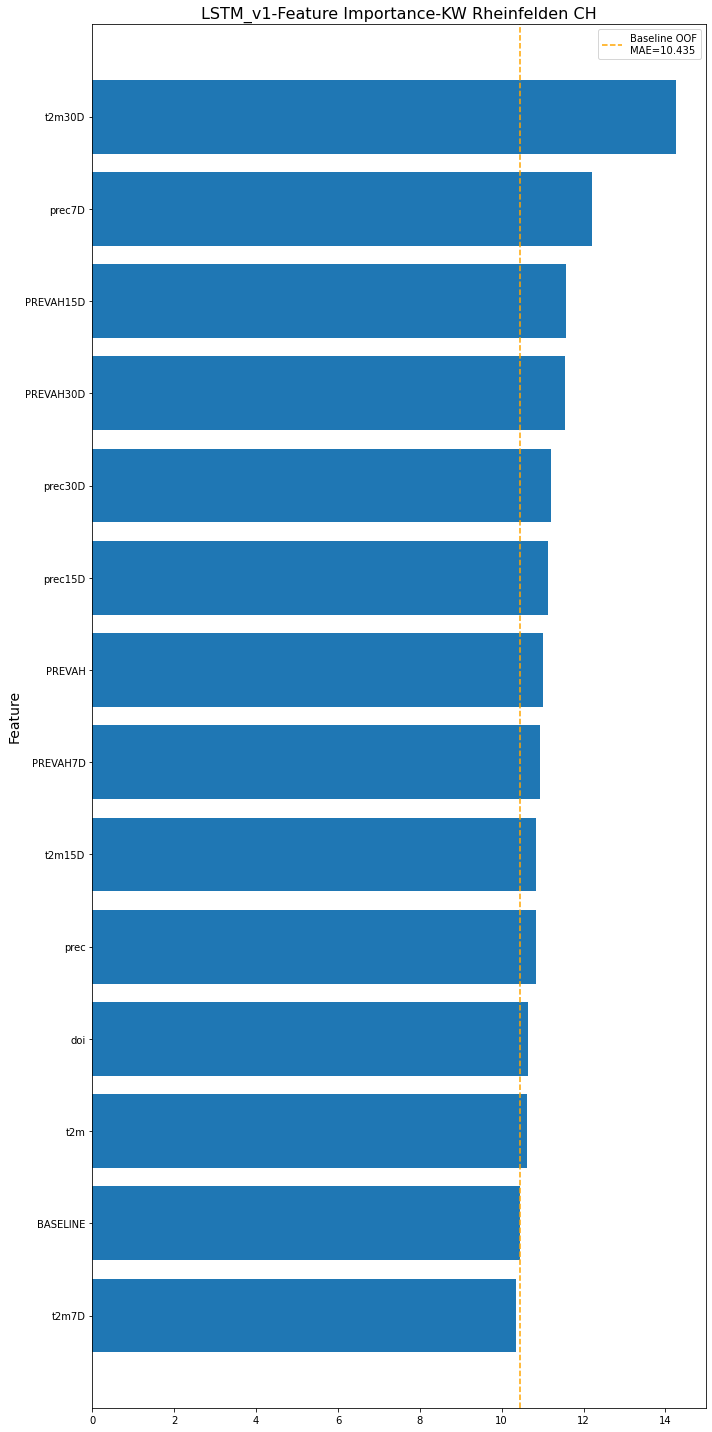

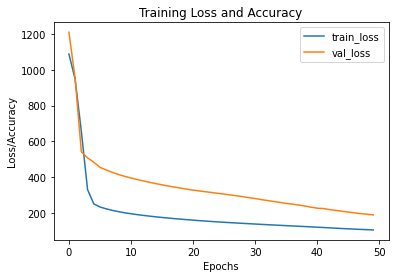

 RMSE: 9.923118
 RMSE: 13.746527


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure KW Rheinfelden CH_ann1_reconstruction
Saving figure KW Rheinfelden CH_ann1_reconstruction
Saving figure KW Rheinfelden CH_ann1test
Saving figure KW Rheinfelden CH_ann1train
preparing data for 4
LSTM_v1


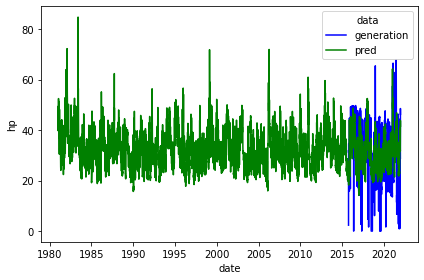

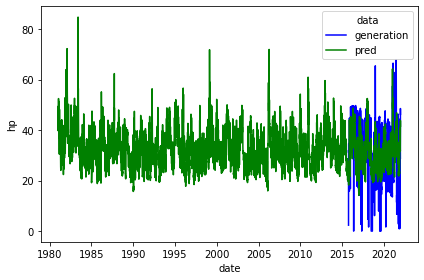

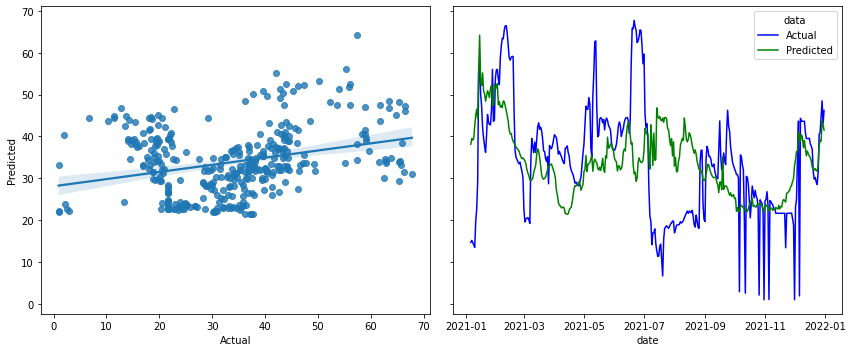

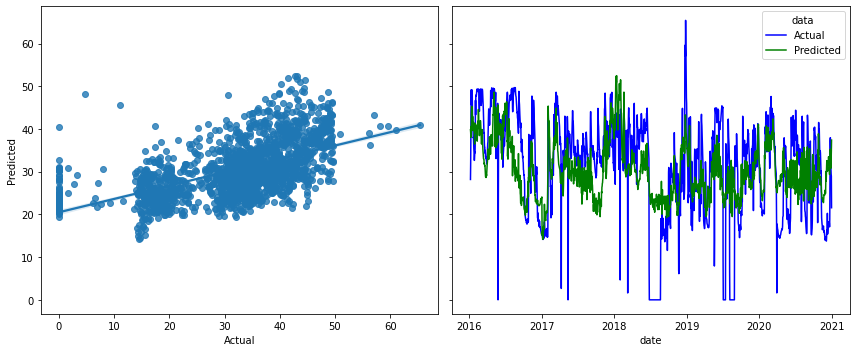

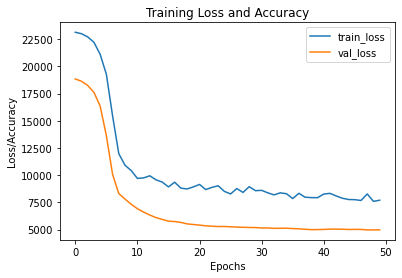

 RMSE: 75.211655
 RMSE: 70.516820


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Kraftwerke Mauvoisin AG_LSTM_v1_reconstruction
Saving figure Kraftwerke Mauvoisin AG_LSTM_v1_reconstruction
Saving figure Kraftwerke Mauvoisin AG_LSTM_v1test
Saving figure Kraftwerke Mauvoisin AG_LSTM_v1train
 Computing LSTM feature importance...


100%|██████████| 13/13 [00:00<00:00, 30.85it/s]
/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



Saving figure Kraftwerke Mauvoisin AG_LSTM_v1Feature_IMPORT_test
ann1


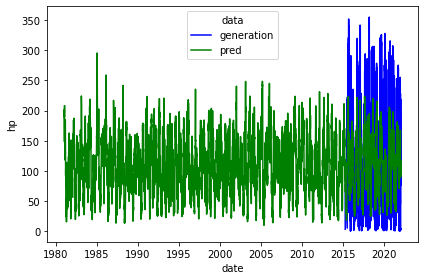

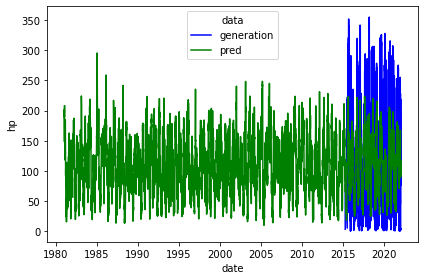

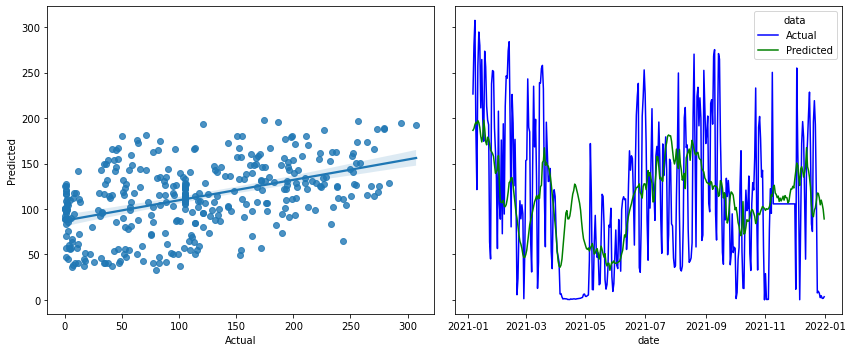

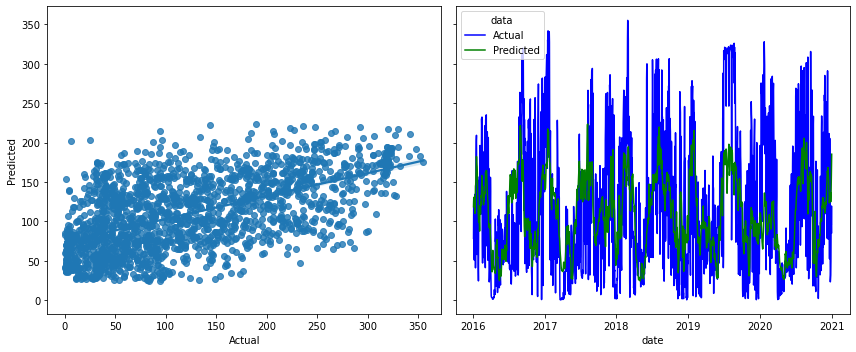

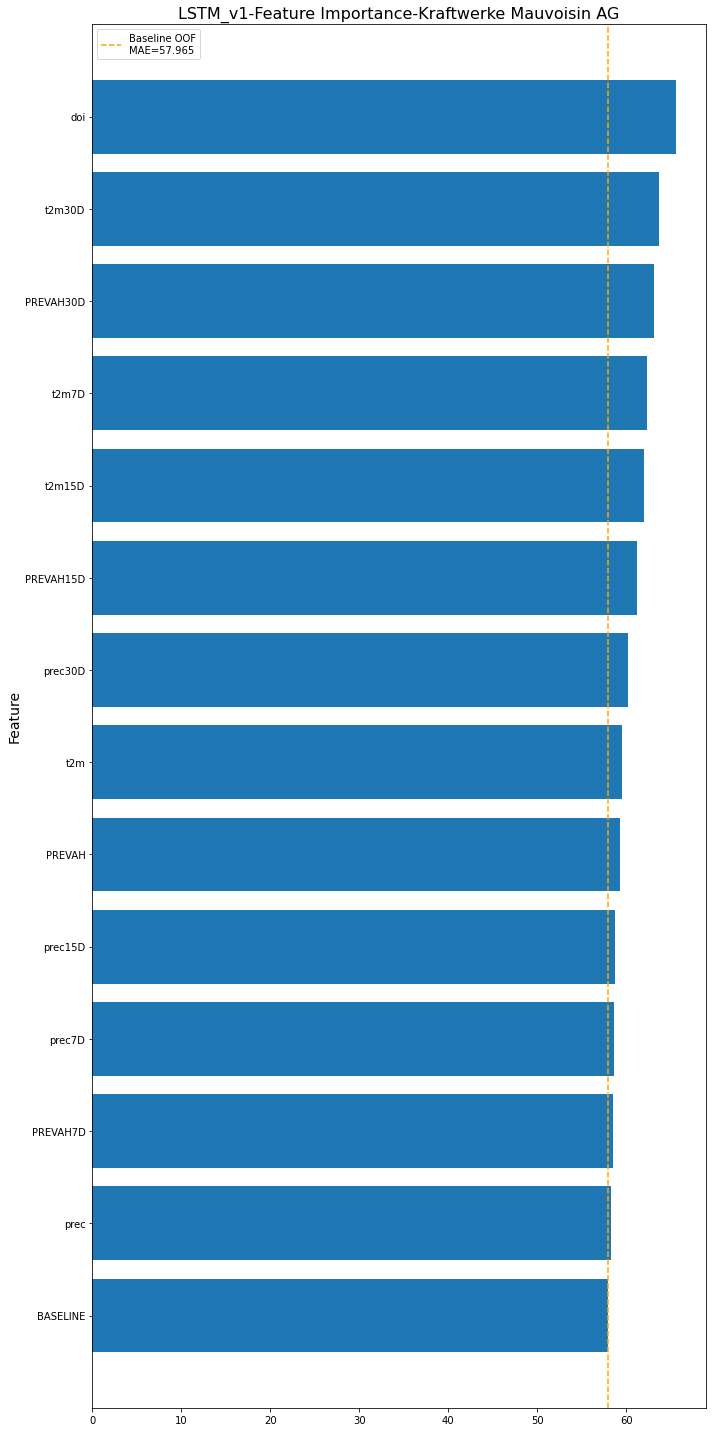

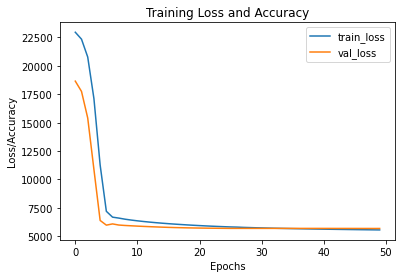

 RMSE: 73.907013
 RMSE: 75.395816


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Kraftwerke Mauvoisin AG_ann1_reconstruction
Saving figure Kraftwerke Mauvoisin AG_ann1_reconstruction
Saving figure Kraftwerke Mauvoisin AG_ann1test
Saving figure Kraftwerke Mauvoisin AG_ann1train
preparing data for 5
selecting different reconstruction dates
LSTM_v1


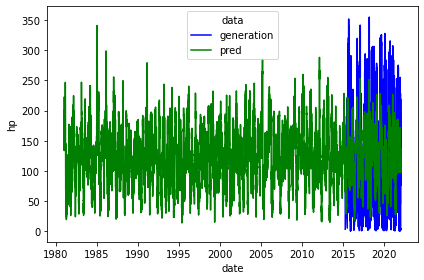

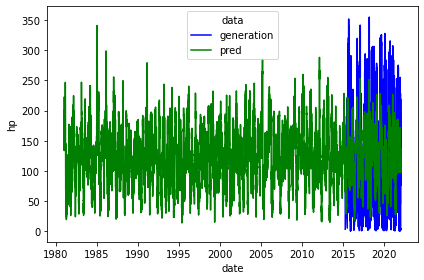

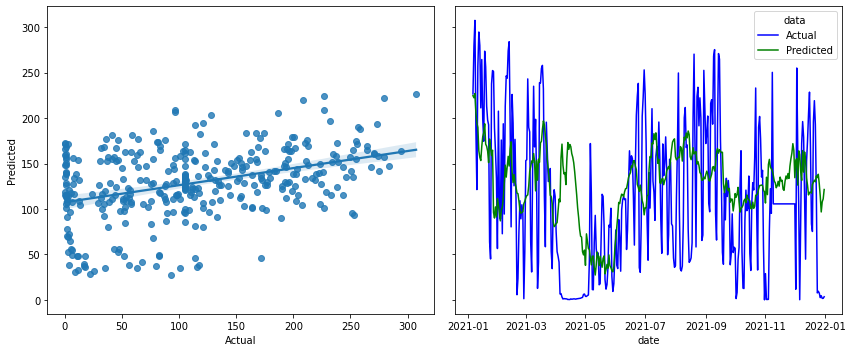

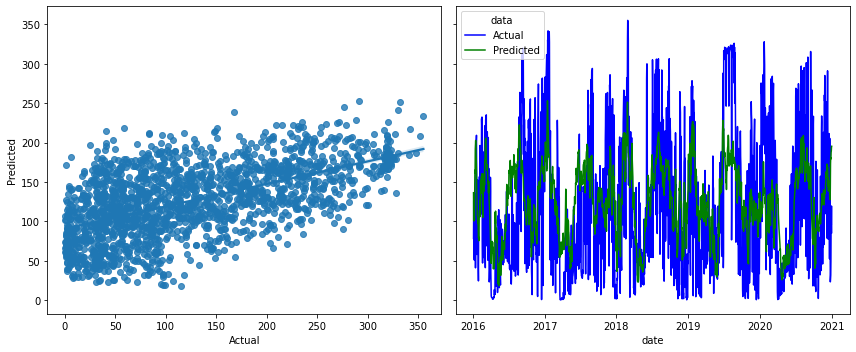

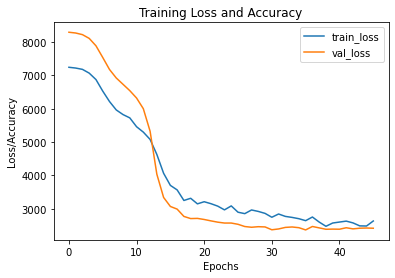

 RMSE: 43.934716
 RMSE: 49.184730


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Blenio (OFIBLE)_LSTM_v1_reconstruction
Saving figure Blenio (OFIBLE)_LSTM_v1_reconstruction
Saving figure Blenio (OFIBLE)_LSTM_v1test
Saving figure Blenio (OFIBLE)_LSTM_v1train
 Computing LSTM feature importance...


100%|██████████| 13/13 [00:00<00:00, 31.50it/s]
/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



Saving figure Blenio (OFIBLE)_LSTM_v1Feature_IMPORT_test
ann1


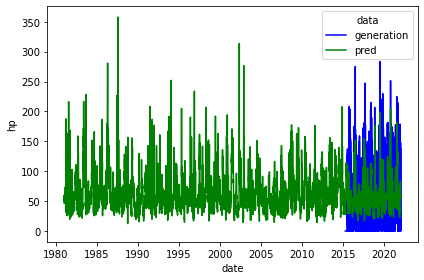

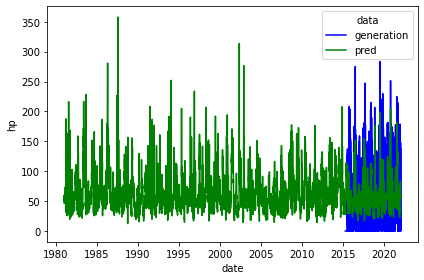

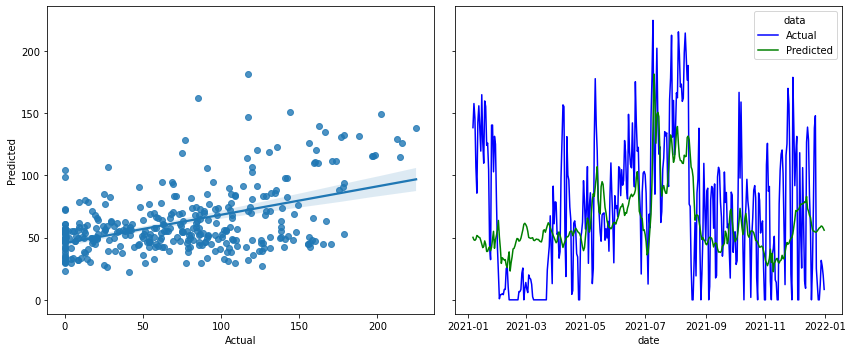

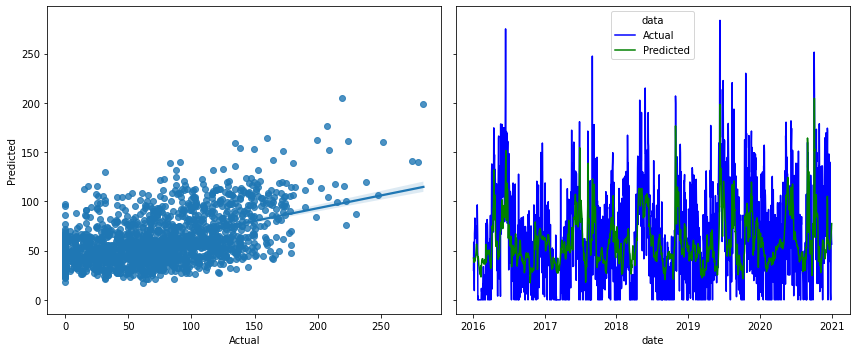

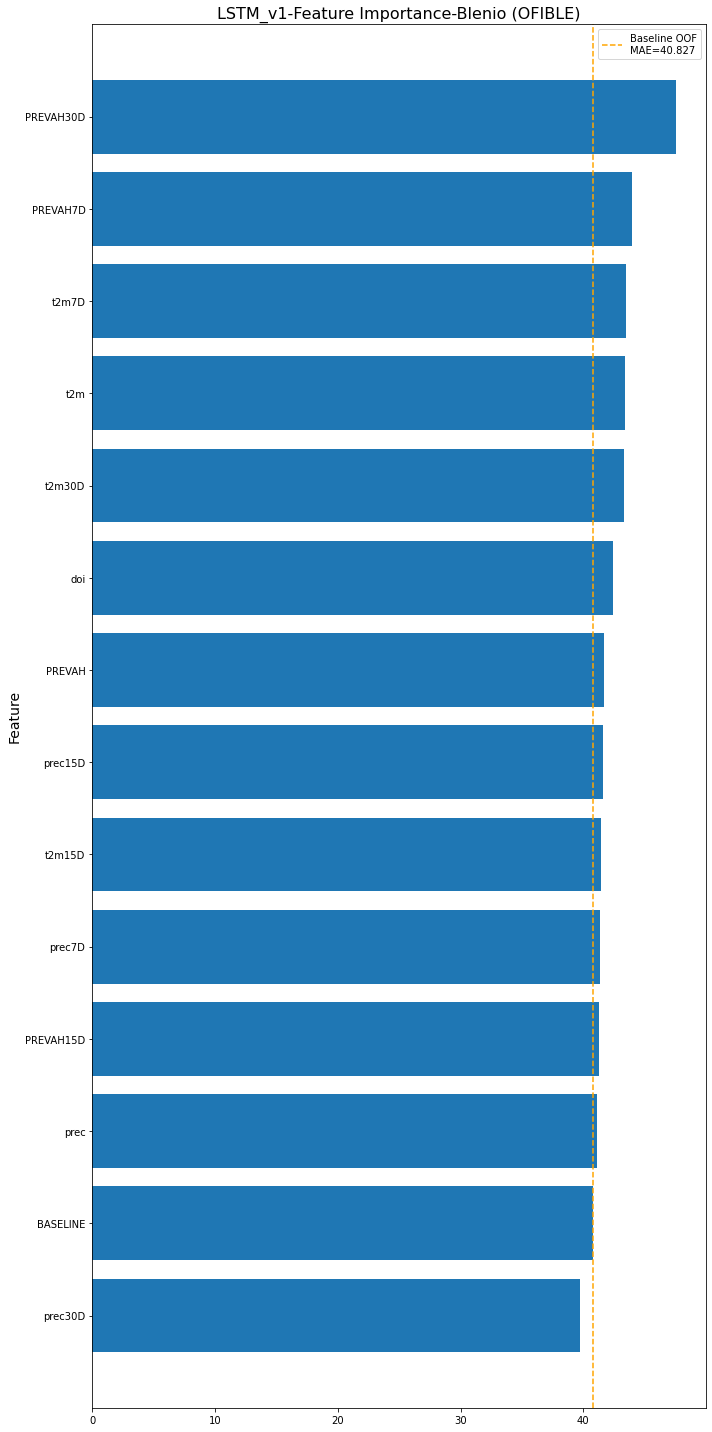

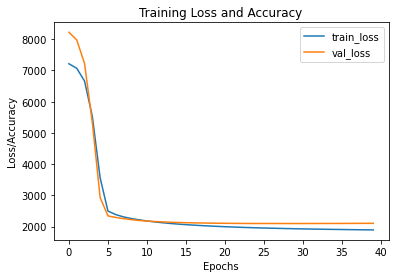

 RMSE: 43.221569
 RMSE: 45.865911


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Blenio (OFIBLE)_ann1_reconstruction
Saving figure Blenio (OFIBLE)_ann1_reconstruction
Saving figure Blenio (OFIBLE)_ann1test
Saving figure Blenio (OFIBLE)_ann1train


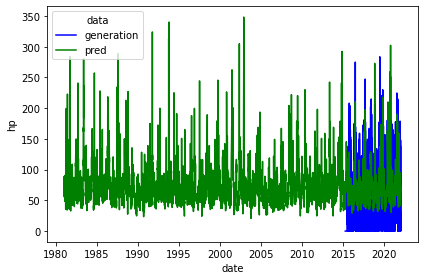

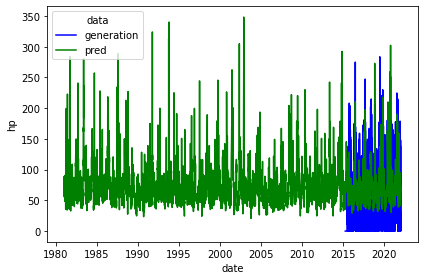

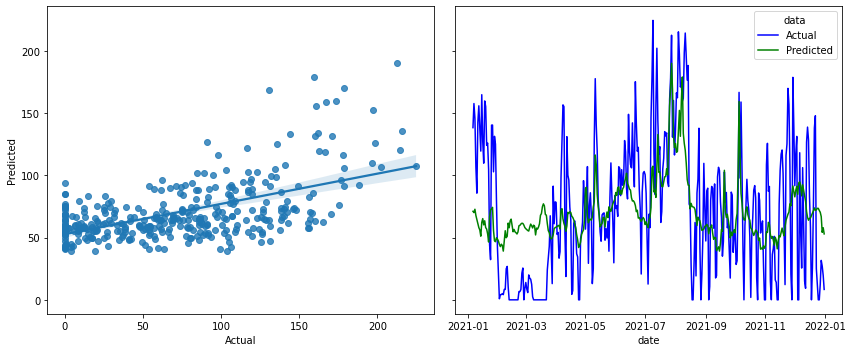

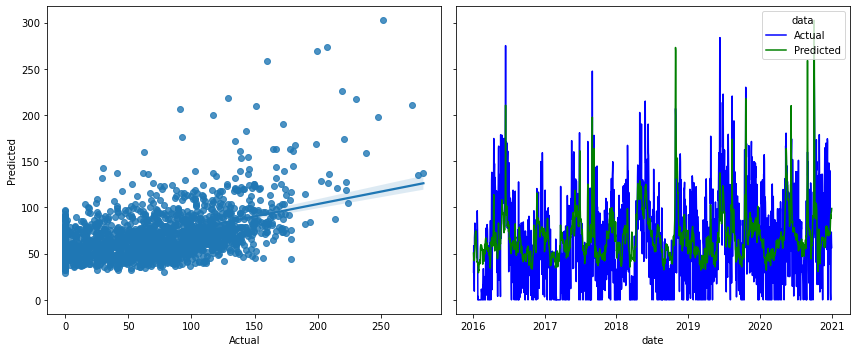

In [42]:
models = ['LSTM_v1','ann1']
l_hist = []
l_mod = []
all_models = []
all_hist = []
all_data = []
W = 5 # number of timesteps
#for station in range(0,2):
    
for station in range(0,len(list_input)):
    print('preparing data for', station)
    df = list_input[station]
    df["date"] = pd.to_datetime(df["date"])
     # add day of the year
    df['doi'] = df.date.dt.dayofyear
    # to store the results
    name_s = df.name_p.unique()
    from numpy import nan
    name_s = [x for x in name_s if x is not nan]
    name_s = ''.join(name_s)
    
    if name_s == 'Emosson (ESA)':
        print('selecting different reconstruction dates')
        df_i = df[(df.date.dt.year >= YY_Emos_RECONSTRUCTION[0]) &  (df.date.dt.year <= YY_TEST[1])]
        dat_train, dat_test, dat_reconstruction, dates_train, dates_test, dates_recons = splitdata(df,YY_TRAIN, YY_TEST, YY_Emos_RECONSTRUCTION)
    elif name_s == 'Blenio (OFIBLE)':
        print('selecting different reconstruction dates')
        df_i = df[(df.date.dt.year >= YY_OFIBLE_RECONSTRUCTION[0]) &  (df.date.dt.year <= YY_TEST[1])]
        dat_train, dat_test, dat_reconstruction, dates_train, dates_test, dates_recons = splitdata(df,YY_TRAIN, YY_TEST, YY_OFIBLE_RECONSTRUCTION)
    else:  
        df_i = df[(df.date.dt.year >= YY_RECONSTRUCTION[0]) &  (df.date.dt.year <= YY_TEST[1])]
        dat_train, dat_test, dat_reconstruction, dates_train, dates_test, dates_recons = splitdata(df,YY_TRAIN, YY_TEST, YY_RECONSTRUCTION)
        
   
    
    l_recons = []
   
    for imod in range(0,len(models)):
        print(models[imod])
     
        if (models[imod] == 'ann1'):
            
            X_train_in, y_train, X_test_in, y_test, X_reconstruction_in, X_all_in, fpipeline  = preparedata_tomodel(dat_train, dat_test, dat_reconstruction, df_i, colnames, label)
            
            
          
        else:
            X_train_in, y_train, X_test_in, y_test, X_reconstruction_in, X_all_in = preparedata_toLSTM(dat_train, dat_test, dat_reconstruction, df_i, Features, label, W)
    
    
        inputs = X_train_in.shape[1:]
        out_mod = HPmodels(inputs, models[imod])
        mod = out_mod.model
            # compile
        mod.compile(loss= loss_f, optimizer= opt)
        
        #BS = 2
        hist = mod.fit(X_train_in, y_train, epochs=EPOCHS, batch_size=BS, validation_data=(X_test_in, y_test), 
                        callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=0, shuffle=False)
        
        plot_hist(hist)
       
        pred_test = mod.predict(X_test_in)
        pred_train = mod.predict(X_train_in)
        rmse_train = evaluate_model(y_train, pred_train.flatten())
        rmse_test = evaluate_model(y_test, pred_test.flatten())
        mae_train = mean_absolute_error(y_train, pred_train.flatten())
        mae_test = mean_absolute_error(y_test, pred_test.flatten())
        
        
        fig_recons = name_s + '_' + models[imod] + '_reconstruction'
        
        if (models[imod] == 'ann1'):
            dat_recons = recons(mod, X_all_in, df_i)
        
        else:
            
            dat_recons = recons(mod,X_all_in, df_i[W:len(df_i)]) 
            
        
         
        # plot reconstructions
        plot_recons(dat_recons,fig_recons, IMAGES_PATH)
        
        dat_recons.columns = ['date','generation','pred_'+ models[imod]]
    
        dat_recons.columns = ['date','generation','pred_'+ models[imod]]
         # plot reconstructions
        plot_recons(dat_recons,fig_recons, IMAGES_PATH)
        
        
        
        df_out = df_out.append({'station': name_s}, ignore_index=True)
        df_out.at[df_out.index[-1],'model'] = models[imod]
        df_out.at[df_out.index[-1], 'train_rmse'] = rmse_train
        df_out.at[df_out.index[-1], 'test_rmse'] = rmse_test
        df_out.at[df_out.index[-1], 'train_mae'] = mae_train
        df_out.at[df_out.index[-1], 'test_mae'] = mae_test

        # add also the correlations between predicted and observed
        cor_train = stats.pearsonr(pred_train.flatten(), y_train)[0]
        cor_test = stats.pearsonr(pred_test.flatten(), y_test)[0]
        df_out.at[df_out.index[-1], 'cor_train'] = cor_train
        df_out.at[df_out.index[-1], 'cor_test'] = cor_test
        
        
        l_recons.append(dat_recons)
        df_recons = pd.concat(l_recons,axis=1)
        df_recons = df_recons.loc[:,~df_recons.columns.duplicated()]

        
        l_hist.append(hist)
        l_mod.append(mod)
        
        if plot:
            
            fig_test = name_s + '_' + models[imod] + 'test' 
            plot_moutput(dates_test[W:len(dates_test)], y_test, pred_test, fig_test, IMAGES_PATH)
            fig_train = name_s + '_' + models[imod] + 'train' 
            plot_moutput(dates_train[W:len(dates_train)], y_train, pred_train, fig_train, IMAGES_PATH)
            
            if models[imod]!='ann1':
                fig_importance = name_s + '_' + models[imod] + 'Feature_IMPORT_test'
                LSTM_imp(mod, X_test_in, y_test, Features, name_s,  models[imod], fig_importance, IMAGES_PATH)
            
    
    new_df = pd.merge(df_i, df_recons,  on=['date'])     
    all_data.append(new_df)
        
    

In [43]:
df_out

,station,model,train_rmse,test_rmse,train_mae,test_mae,cor_train,cor_test
0,AET Leventina,LSTM_v1,24.853553,32.171998,18.837263,26.334748,0.807629,0.783484
1,AET Leventina,ann1,23.780752,29.760232,17.48685,23.506523,0.783857,0.805083
2,Electra-Massa (EM),LSTM_v1,47.393901,45.031762,31.207476,27.43344,0.92691,0.907911
3,Electra-Massa (EM),ann1,42.843261,40.291407,27.417366,24.612823,0.924514,0.920535
4,Emosson (ESA),LSTM_v1,42.953642,39.634069,33.512894,32.565388,0.451842,0.350249
5,Emosson (ESA),ann1,42.801687,38.75625,34.283188,32.363118,0.426242,0.405446
6,KW Rheinfelden CH,LSTM_v1,10.226395,13.372649,8.306632,10.435352,0.629244,0.386594
7,KW Rheinfelden CH,ann1,9.923118,13.746527,7.925492,10.541199,0.589189,0.29807
8,Kraftwerke Mauvoisin AG,LSTM_v1,75.211655,70.51682,60.820282,57.964699,0.559418,0.46274
9,Kraftwerke Mauvoisin AG,ann1,73.907013,75.395816,61.416217,61.769743,0.560709,0.383132


In [44]:
PATH_OUT

'/Users/noeliaotero/Documents/OCCR/Results/Hydro_project/Analysis_Updates_June/'

In [45]:
df_out.to_csv(PATH_OUT + 'LSTM_PREVAH_table_perf_PREVAH.csv')